# Machine Learning
# Neural Networks and Backpropagation
## TP-1 
## May 2018



### Álvaro Salgado
### salgado.alvaro@me.com

## Objectives
The present work is part of the discipline "Machine Learning" given at the graduate level in the Department of Computer Science - Federal University of Minas Gerais - Brazil (DCC/UFMG).

The main objective is to study the behavior of a MLP network trained on the "mnist" dataset, evaluating and discussing the design choices such as the number of hidden units and type of training, and their impact on the quality of the results.



## Experimental Setup

The model implemented will be a three layer MLP, with a sigmoid hidden layer (logistic sigmoid function: $f(x) = \frac{1}{1 + e^{-x}}$) and a softmax output layer (adequate for multiclass problems). 

The loss function will be the "cross entropy" as shown below:

$$J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K}{[-y_k^{(i)}log((h_{\theta}(x^{(i)}))_k)-(1-y_k^{(i)})log(1-(h_{\theta}(x^{(i)}))_k)]}$$

where $m$ is the number of training examples (or instances) and $k$ is the number of possible results (or the number of classes). Also, $y_k^{(i)}$ represents the correct answer for each input example $i$, and $(h_{\theta}(x^{(i)}))_k$ represents the output given by the neural network.

The dataset to be used is part of the "mnist" dataset, which contains images of handwritten characters (from 0 to 9). Each input is a 28 x 28 pixel image, unrolled into a 784 dimensions vector, in which the values for each dimension can vary between 0 and 255 (gray scale).

The dataset provided contains 5000 labled examples, where the first column corresponds to the label, i.e., 0 to 9.

Therefore, the MLP neural network to be implemented will contain 784 inputs and 10 outputs. The hidden layer size will be adjusted between 25, 50 and 100 units.

Three training procedures will be compared:
1. Gradient descent, where the whole training set is processed for each gradient calculation.
2. Stochastic gradient descent, where the gradient and weight updates are calculated after each input instance.
3. Mini-Batch, where the gradient and weight updates are calculated after a small batch of input instances is processed. Batch sizes will be 10 and 50 inputs.

The learning rate $(\eta)$ will also be adjusted between 0.5, 1 and 10.

The effect of the regularization parameter $(\lambda)$ will be investigated as well.

The dataset will be split between training and test datasets to the proportion of 4/1. The trained model will be evaluated on the test set.

## Visualizing the data

The first thing to do is to understand the kind of data we are dealing with.
We were given a csv file containing 5000 lines. Each line has 785 characters (integers), beginning with the label, a number from 0 to 9, after which we have the 784 positions on our input vector. 

Each position corresponds to a pixel in a 28 x 28 image, and the number in each position corresponds to the intensity in a grayscale that goes from 0 to 255 (8 bits).

In [1]:
import matplotlib.pyplot as plt
import matplotlib 
import pandas as pd
import numpy as np
from numpy import random as rnd 

In [2]:
""" Import data 
##################################################################"""
df_data = pd.read_csv('data_tp1.txt', header=None)

In [3]:
X = np.array(df_data)
X = X[:,1:]
Y = np.array(df_data[0])

Below we can see how our data set is organised. 

df_X contains the inputs, where each value in a row correspond to a pixel in that sample image. Most values are equal to 0, i.e., empty pixels.

df_Y contains the labels, where each value corresponds to the correct classification of its respective input.

In [4]:
df_X = pd.DataFrame(X)

In [5]:
df_X.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_Y = pd.DataFrame(Y)

In [7]:
df_Y.head()

,0
0,7
1,2
2,1
3,0
4,4


Let's take a closer look at one of the samples.

Below we can see the data stored inside the first sample of the dataset. Each position corresponds to a pixel in the 28 x 28 image. As expected, the pixel values vary between 0 and 255 on a 8 bit gray scale.

In [8]:
print(X[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 222 254 254 254
 254 241 198 198 198 198 198 198 198 198 170  52   

The fact that the values vary between 0 and 255 proves to be a problem for the neural network we will use. Usually values should be scaled to stay in a range between 0 and 1, or to be represented by a normal distribution centered on 0 with a variance of 1.

Therefore, we will apply what is called _"feature scaling"_ to the input samples:

$$x = \frac{x - x_{min}}{x_{max} - x_{min}}$$

which, in our case, is achieved by dividing each of the values by 255.

In [9]:
X = X / 255 # Feature scaling

Now we will take a look at how this dataset is related to real handwritten digits. To do this, we will visualize the original image.

The codes used below for visualization were taken from:

http://sdsawtelle.github.io/blog/output/week4-andrew-ng-machine-learning-with-python.html


Label:  3


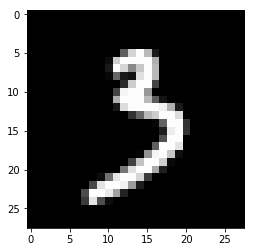

In [10]:
""" Let's visualize one sample 
##################################################################"""

index = 3432

im = X[index]  
im = np.reshape(im, (28, 28), order = "A")  
graymap = plt.get_cmap("gray")
fig1 = plt.figure()
fig1 = plt.imshow(im, cmap = graymap, interpolation="None")  
print("Label: ", Y[index])
plt.show()

Now let's take a look at some other examples:

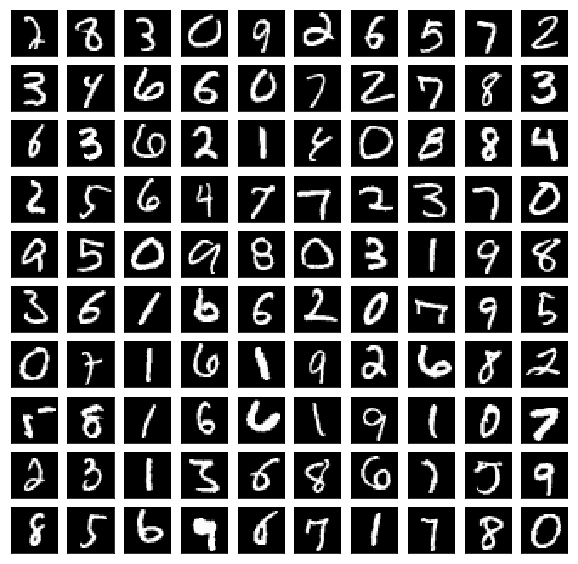

In [11]:
""" Let's visualize 100 samples
##################################################################"""

indxs = rnd.choice(5000, 100, replace=False)  

# Create a new figure with 100 axes objects inside it (subplots)
fig, axs = plt.subplots(10, 10, sharex=True, sharey=True, figsize=(10,10)) 
axs = axs.flatten()  # The returned axs is actually a matrix holding the handles to all the subplot axes objects
graymap = plt.get_cmap("gray")

for i, indx in enumerate(indxs):
    im_mat = np.reshape(X[indx], (28, 28), order = "A")
    axs[i].imshow(im_mat, cmap = graymap, interpolation="None")
    axs[i].xaxis.set_visible(False)  # Hide the axes labels for clarity
    axs[i].yaxis.set_visible(False) 
    
plt.show()

Now that we have toyed with and understood our dataset, it's time to do some experimentation on an actual neural network.

## Training and Test Datasets
Since we want to be able to evaluate our network against data that wasn't seen during training, we will split our data set between training and test sets, so that we can verify our model's quality and capacity for generalization, making sure that it doesn't end up overfitting the traing data.

In [12]:
""" Split data between training and test sets
##################################################################"""
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Performance scores
Since we will evaluate our model's behavior on a test dataset, it is important to choose adequate performance metrics.

#### Accuracy
Accuracy is equal to the number of test samples that are correctly classified over all test samples. In our case, where the dataset is well balanced and there are roughtly equal ammounts of samples for each class, accuracy is a fairly adequate metric.

In very unbalanced datasets, where there are many more instances of one class than the other, different metrics are necessary.

#### Precision
Precision is the ratio of correctly predicted samples of a specific class, over all samples that were predicted to belong to that class.

$$Precision = \frac{True Positives}{True Positives + False Positives}$$

#### Recall (Sensitivity)
Recall is the ratio of correctly predicted samples of a specific class, over all samples that really belong to that class.

$$Recall = \frac{True Positives}{True Positives + False Negatives}$$

#### F1 Score
F1 Score is a weighted average of precision and recall.

#### Which one?
In our case, accuracy gives a good performance metric.

In cases where the dataset is unbalanced, or where mistakes have different consequences wether they are false positives or false negatives (e.g. medical diagnostics), it is important to look at precision and recall.

## MLP Neural Network
For this work we were allowed to use third party machine learning solutions. Since it should be a simple and quick investigation, we will use Python's package _"SciKit-Learn"_, which contains a MLP Classifier that suits our needs just fine.

This model allows the adjustment of all the hyper-parameters we will be working with, evaluates the cross-entropy loss function and is very easy to setup and use.

First, we need to import the class MLPClassifier

In [149]:
""" Import MLP and tools
##################################################################"""
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

## Training our model

On the code cell bellow, we create and set our neural network classifier.

We will start with 25 hidden units with sigmoid ("logistic") activation function.

The learning rate $(\eta)$ is set to 0.5.

MLPClassifier uses *L2* regularization by default, with a value of 0.0001 for $\lambda$. We will leave it like this for now and vary it later to see how it impacts on our results.

MLPClassifier uses mini-batches by default. We will set the value to 4000 so that the whole training set is used on each epoch. We will test other approaches later. Also, we will set _"shuffle = True"_ so that at each epoch the data is given for training in a new random order.

We won't use momentum at this time.

We will put a high cap on maximum iterations (10,000) to better analise the model's training behavior.

## Varying learning rates
First we will evaluate the training behavior for a _"full dataset batch"_ (i.e., gradient descent training), while the _"learning rate"_ is varied between the values 0.5, 1 and 10.

In [90]:
mlp_eta_05 = MLPClassifier(solver="sgd")
mlp_eta_05.hidden_layer_sizes = (25,)
mlp_eta_05.activation = "logistic"
mlp_eta_05.learning_rate_init = 0.5
mlp_eta_05.alpha = 0.0001
mlp_eta_05.batch_size = 4000
mlp_eta_05.shuffle = True
mlp_eta_05.random_state = 29
mlp_eta_05.momentum = 0
mlp_eta_05.verbose = False
mlp_eta_05.max_iter = 10000

mlp_eta_05.fit(X_train, Y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size=4000,
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(25,), learning_rate='constant',
       learning_rate_init=0.5, max_iter=10000, momentum=0,
       nesterovs_momentum=True, power_t=0.5, random_state=29, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [93]:
mlp_eta_1 = MLPClassifier(solver="sgd")
mlp_eta_1.hidden_layer_sizes = (25,)
mlp_eta_1.activation = "logistic"
mlp_eta_1.learning_rate_init = 1
mlp_eta_1.alpha = 0.0001
mlp_eta_1.batch_size = 4000
mlp_eta_1.shuffle = True
mlp_eta_1.random_state = 29
mlp_eta_1.momentum = 0
mlp_eta_1.verbose = False
mlp_eta_1.max_iter = 10000

mlp_eta_1.fit(X_train, Y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size=4000,
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(25,), learning_rate='constant',
       learning_rate_init=1, max_iter=10000, momentum=0,
       nesterovs_momentum=True, power_t=0.5, random_state=29, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [95]:
mlp_eta_10 = MLPClassifier(solver="sgd")
mlp_eta_10.hidden_layer_sizes = (25,)
mlp_eta_10.activation = "logistic"
mlp_eta_10.learning_rate_init = 10
mlp_eta_10.alpha = 0.0001
mlp_eta_10.batch_size = 4000
mlp_eta_10.shuffle = True
mlp_eta_10.random_state = 29
mlp_eta_10.momentum = 0
mlp_eta_10.verbose = False
mlp_eta_10.max_iter = 10000

mlp_eta_10.fit(X_train, Y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size=4000,
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(25,), learning_rate='constant',
       learning_rate_init=10, max_iter=10000, momentum=0,
       nesterovs_momentum=True, power_t=0.5, random_state=29, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

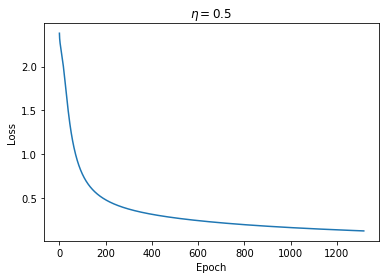

Loss: 		 0.12827630233023052
Iterations: 	 1317


In [119]:
fig_mlp_eta_05 = plt.figure()
ax1 = fig_mlp_eta_05.add_subplot(111)
ax1.plot(mlp_eta_05.loss_curve_)
ax1.set(title=r"$\eta = 0.5$", xlabel="Epoch", ylabel="Loss")

plt.show()

print('Loss: \t\t', mlp_eta_05.loss_)
print('Iterations: \t', mlp_eta_05.n_iter_)

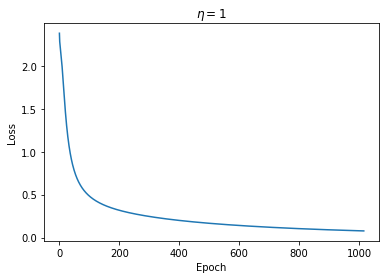

Loss: 		 0.07727741722988071
Iterations: 	 1017


In [120]:
fig_mlp_eta_1 = plt.figure()
ax1 = fig_mlp_eta_1.add_subplot(111)
ax1.plot(mlp_eta_1.loss_curve_)
ax1.set(title=r"$\eta = 1$", xlabel="Epoch", ylabel="Loss")

plt.show()

print('Loss: \t\t', mlp_eta_1.loss_)
print('Iterations: \t', mlp_eta_1.n_iter_)

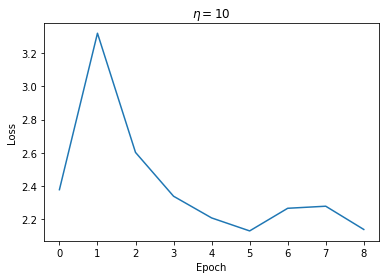

Loss: 		 2.139794626655585
Iterations: 	 9


In [121]:
fig_mlp_eta_10 = plt.figure()
ax1 = fig_mlp_eta_10.add_subplot(111)
ax1.plot(mlp_eta_10.loss_curve_)
ax1.set(title=r"$\eta = 10$", xlabel="Epoch", ylabel="Loss")

plt.show()

print('Loss: \t\t', mlp_eta_10.loss_)
print('Iterations: \t', mlp_eta_10.n_iter_)

The results above show that increasing the learning rate $\eta$ from 0.5 to 1 slightly speed up convergence (from 1317 to 1017 iterations) and return a lower final loss on the training set (from 0.13 to 0.08).

However, once we increase the learning rate to 10, the training doesn't even reach convergence. This was expected, since a large learning rate makes the walk over the _"Loss surface"_ unstable, as it doesn't allow the training algorithm to settle on a minimum. 

You can see it as a giant walking on a moutain range and trying to reach the bottom of a valley, but whose steps are so large that it keeps switching back and forth between the opposing mountains and never actually reaching the bottom of the valley.

Let's see how well our models classify previously unseen data (_"test dataset"_).

In [161]:
print('\nLearning Rate = 0.5\n')
print('Accuracy: ', accuracy_score(Y_test, mlp_eta_05.predict(X_test)), '\n')
print(classification_report(Y_test, mlp_eta_05.predict(X_test)))


Learning Rate = 0.5

Accuracy:  0.907 

             precision    recall  f1-score   support

          0       0.94      0.96      0.95        83
          1       0.92      0.98      0.95       113
          2       0.87      0.91      0.89        89
          3       0.89      0.87      0.88        85
          4       0.91      0.91      0.91       106
          5       0.86      0.85      0.86       113
          6       0.95      0.90      0.92        96
          7       0.96      0.92      0.94       109
          8       0.87      0.86      0.87       108
          9       0.91      0.92      0.91        98

avg / total       0.91      0.91      0.91      1000



In [162]:
print('\nLearning Rate = 1\n')
print('Accuracy: ', accuracy_score(Y_test, mlp_eta_1.predict(X_test)), '\n')
print(classification_report(Y_test, mlp_eta_1.predict(X_test)))


Learning Rate = 1

Accuracy:  0.916 

             precision    recall  f1-score   support

          0       0.94      0.96      0.95        83
          1       0.93      0.98      0.96       113
          2       0.88      0.93      0.91        89
          3       0.91      0.88      0.90        85
          4       0.91      0.91      0.91       106
          5       0.87      0.86      0.86       113
          6       0.96      0.92      0.94        96
          7       0.95      0.93      0.94       109
          8       0.90      0.89      0.89       108
          9       0.92      0.91      0.91        98

avg / total       0.92      0.92      0.92      1000



In [163]:
print('\nLearning Rate = 10\n')
print('Accuracy: ', accuracy_score(Y_test, mlp_eta_10.predict(X_test)), '\n')
print(classification_report(Y_test, mlp_eta_10.predict(X_test)))


Learning Rate = 10

Accuracy:  0.134 

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        83
          1       0.13      1.00      0.23       113
          2       0.06      0.06      0.06        89
          3       0.00      0.00      0.00        85
          4       0.00      0.00      0.00       106
          5       0.00      0.00      0.00       113
          6       0.00      0.00      0.00        96
          7       0.00      0.00      0.00       109
          8       0.00      0.00      0.00       108
          9       0.23      0.16      0.19        98

avg / total       0.04      0.13      0.05      1000



/Users/alvaro/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Different batch sizes
So our model is converging only very slowly or not at all. What can we do to improve its performance?

It is known that _gradient descent_ with the whole training set being used for each epoch tends to result in a slow but sure convergence. This could be the case.

On the other hand, _stochastic gradient descent_, in which the error and weight updates are done for each sample, one at a time, tends to converge fast but be unstable, requiring a fine adjustment of other hyper-parameters, such as learning rate.

In the middle, _mini-batches_ approach (which uses some of the samples, but not all of them, in each training epoch) is shown to possess both advantages above, i.e., convergence speed and stability.

Let's test them and see what happens, beginning with _stochastic gradient descent_.

### SGD training (batch size = 1)

In [99]:
mlp_SGD = MLPClassifier(solver="sgd")
mlp_SGD.hidden_layer_sizes = (25,)
mlp_SGD.activation = "logistic"
mlp_SGD.learning_rate_init = 0.5
mlp_SGD.alpha = 0.0001
mlp_SGD.batch_size = 1
mlp_SGD.shuffle = True
mlp_SGD.random_state = 29
mlp_SGD.momentum = 0
mlp_SGD.verbose = False
mlp_SGD.max_iter = 10000

mlp_SGD.fit(X_train, Y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size=1, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(25,), learning_rate='constant',
       learning_rate_init=0.5, max_iter=10000, momentum=0,
       nesterovs_momentum=True, power_t=0.5, random_state=29, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

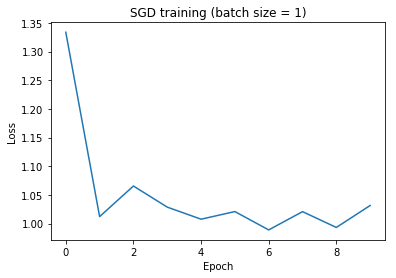

Loss: 		 1.0317056319409774
Iterations: 	 10


In [106]:
fig_mlp_SGD = plt.figure()
ax1 = fig_mlp_SGD.add_subplot(111)
ax1.plot(mlp_SGD.loss_curve_)
ax1.set(title=r"SGD training (batch size = 1)", xlabel="Epoch", ylabel="Loss")

plt.show()

print('Loss: \t\t', mlp_SGD.loss_)
print('Iterations: \t', mlp_SGD.n_iter_)

As can be seen on the results above, _stochastic gradient descent_ shows unstable behavior and doesn't converge as it is. We can try to reduce the learning rate and increase the regularization coefficient in hopes of smoothing the training steps (the _"search"_ over the loss surface).

In [101]:
mlp_SGD2 = MLPClassifier(solver="sgd")
mlp_SGD2.hidden_layer_sizes = (25,)
mlp_SGD2.activation = "logistic"
mlp_SGD2.learning_rate_init = 0.01
mlp_SGD2.alpha = 0.1
mlp_SGD2.batch_size = 1
mlp_SGD2.shuffle = True
mlp_SGD2.random_state = 29
mlp_SGD2.momentum = 0
mlp_SGD2.verbose = False
mlp_SGD2.max_iter = 10000

mlp_SGD2.fit(X_train, Y_train)

MLPClassifier(activation='logistic', alpha=0.1, batch_size=1, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(25,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=10000, momentum=0,
       nesterovs_momentum=True, power_t=0.5, random_state=29, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

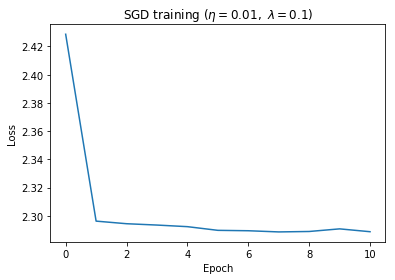

Loss: 		 2.2887581216703
Iterations: 	 11


In [109]:
fig_mlp_SGD2 = plt.figure()
ax1 = fig_mlp_SGD2.add_subplot(111)
ax1.plot(mlp_SGD2.loss_curve_)
ax1.set(title=r"SGD training $\eta = 0.01, \ \lambda = 0.1$", xlabel="Epoch", ylabel="Loss")

plt.show()

print('Loss: \t\t', mlp_SGD2.loss_)
print('Iterations: \t', mlp_SGD2.n_iter_)

The changes weren't enough to make the training work. 

We can try now to use the _mini-batch_ approach.

## Mini-Batch
Batch sizes tested will be 10, 50 and 500 samples.

In [122]:
mlp_MB10 = MLPClassifier(solver="sgd")
mlp_MB10.hidden_layer_sizes = (25,)
mlp_MB10.activation = "logistic"
mlp_MB10.learning_rate_init = 0.5
mlp_MB10.alpha = 0.0001
mlp_MB10.batch_size = 10
mlp_MB10.shuffle = True
mlp_MB10.random_state = 29
mlp_MB10.momentum = 0
mlp_MB10.verbose = False
mlp_MB10.max_iter = 10000

mlp_MB10.fit(X_train, Y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size=10, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(25,), learning_rate='constant',
       learning_rate_init=0.5, max_iter=10000, momentum=0,
       nesterovs_momentum=True, power_t=0.5, random_state=29, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [123]:
mlp_MB50 = MLPClassifier(solver="sgd")
mlp_MB50.hidden_layer_sizes = (25,)
mlp_MB50.activation = "logistic"
mlp_MB50.learning_rate_init = 0.5
mlp_MB50.alpha = 0.0001
mlp_MB50.batch_size = 50
mlp_MB50.shuffle = True
mlp_MB50.random_state = 29
mlp_MB50.momentum = 0
mlp_MB50.verbose = False
mlp_MB50.max_iter = 10000

mlp_MB50.fit(X_train, Y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size=50, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(25,), learning_rate='constant',
       learning_rate_init=0.5, max_iter=10000, momentum=0,
       nesterovs_momentum=True, power_t=0.5, random_state=29, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [124]:
mlp_MB500 = MLPClassifier(solver="sgd")
mlp_MB500.hidden_layer_sizes = (25,)
mlp_MB500.activation = "logistic"
mlp_MB500.learning_rate_init = 0.5
mlp_MB500.alpha = 0.0001
mlp_MB500.batch_size = 500
mlp_MB500.shuffle = True
mlp_MB500.random_state = 29
mlp_MB500.momentum = 0
mlp_MB500.verbose = False
mlp_MB500.max_iter = 10000

mlp_MB500.fit(X_train, Y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size=500, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(25,), learning_rate='constant',
       learning_rate_init=0.5, max_iter=10000, momentum=0,
       nesterovs_momentum=True, power_t=0.5, random_state=29, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

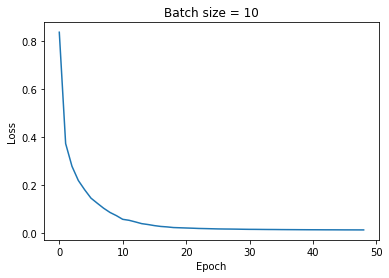

Loss: 		 0.013735572552922794
Iterations: 	 49


In [125]:
fig_mlp_MB10 = plt.figure()
ax1 = fig_mlp_MB10.add_subplot(111)
ax1.plot(mlp_MB10.loss_curve_)
ax1.set(title=r"Batch size = 10", xlabel="Epoch", ylabel="Loss")

plt.show()

print('Loss: \t\t', mlp_MB10.loss_)
print('Iterations: \t', mlp_MB10.n_iter_)

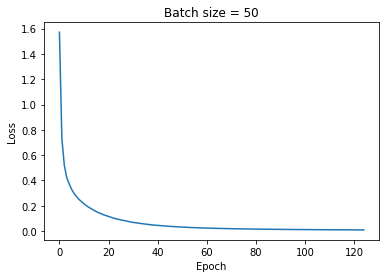

Loss: 		 0.009333046934148364
Iterations: 	 125


In [126]:
fig_mlp_MB50 = plt.figure()
ax1 = fig_mlp_MB50.add_subplot(111)
ax1.plot(mlp_MB50.loss_curve_)
ax1.set(title=r"Batch size = 50", xlabel="Epoch", ylabel="Loss")

plt.show()

print('Loss: \t\t', mlp_MB50.loss_)
print('Iterations: \t', mlp_MB50.n_iter_)

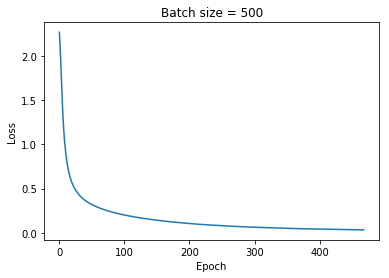

Loss: 		 0.032313840998106115
Iterations: 	 469


In [127]:
fig_mlp_MB500 = plt.figure()
ax1 = fig_mlp_MB500.add_subplot(111)
ax1.plot(mlp_MB500.loss_curve_)
ax1.set(title=r"Batch size = 500", xlabel="Epoch", ylabel="Loss")

plt.show()

print('Loss: \t\t', mlp_MB500.loss_)
print('Iterations: \t', mlp_MB500.n_iter_)

From the results above, it can be seen that the larger the batch size, the longer it takes for the training to converge. However, all three cases reached a lower loss than the first _gradient descent_ (whole dataset training).

The sweet spot, as far as loss function is concerned, seems to be between a batch size of 10 and 50.

Maybe the reason why SGD didn't work and MB10 did is because our dataset has 10 classes. Think about it... in SGD, the error is calculated for each single input, and the weights are updated for each single input. This makes the network change directions wildly and abruptly on the error surface, because in this iteration it is adjusting for a misclassified "one", next iteration it has to adjust for a misclassified "eight".

When you calculate the error over a batch of, say, 10 samples, there's a higher probability that it will be averaged over a more varied group, representative of a higher number of classes, and the adjustment will be done based on this average error that now represents more classes. Maybe that's why, in our case, 10 is a magic number for batch size.

Now, let's see what happens when we change the number of units in the hidden layer.

In [164]:
print('\nBatch Size = 10\n')
print('Accuracy: ', accuracy_score(Y_test, mlp_MB10.predict(X_test)), '\n')
print(classification_report(Y_test, mlp_MB10.predict(X_test)))


Batch Size = 10

Accuracy:  0.92 

             precision    recall  f1-score   support

          0       0.94      0.95      0.95        83
          1       0.94      0.98      0.96       113
          2       0.90      0.92      0.91        89
          3       0.93      0.88      0.90        85
          4       0.92      0.92      0.92       106
          5       0.89      0.89      0.89       113
          6       0.92      0.94      0.93        96
          7       0.95      0.93      0.94       109
          8       0.89      0.87      0.88       108
          9       0.92      0.92      0.92        98

avg / total       0.92      0.92      0.92      1000



In [165]:
print('\nBatch Size = 50\n')
print('Accuracy: ', accuracy_score(Y_test, mlp_MB50.predict(X_test)), '\n')
print(classification_report(Y_test, mlp_MB50.predict(X_test)))


Batch Size = 50

Accuracy:  0.919 

             precision    recall  f1-score   support

          0       0.92      0.95      0.93        83
          1       0.96      0.98      0.97       113
          2       0.87      0.90      0.88        89
          3       0.91      0.88      0.90        85
          4       0.92      0.92      0.92       106
          5       0.88      0.88      0.88       113
          6       0.96      0.94      0.95        96
          7       0.94      0.93      0.94       109
          8       0.91      0.89      0.90       108
          9       0.91      0.93      0.92        98

avg / total       0.92      0.92      0.92      1000



In [166]:
print('\nBatch Size = 500\n')
print('Accuracy: ', accuracy_score(Y_test, mlp_MB500.predict(X_test)), '\n')
print(classification_report(Y_test, mlp_MB500.predict(X_test)))


Batch Size = 500

Accuracy:  0.919 

             precision    recall  f1-score   support

          0       0.96      0.96      0.96        83
          1       0.94      0.98      0.96       113
          2       0.88      0.92      0.90        89
          3       0.94      0.88      0.91        85
          4       0.92      0.92      0.92       106
          5       0.87      0.88      0.87       113
          6       0.94      0.93      0.93        96
          7       0.95      0.93      0.94       109
          8       0.92      0.90      0.91       108
          9       0.89      0.90      0.89        98

avg / total       0.92      0.92      0.92      1000



## Hidden Layer
Another hyper-parameter that can be adjusted is the number of hidden layers and the number of units in each hidden layer.

A MLP with a single hidden layer is a _"universal approximator"_, meaning that it can approximate any continuous function given a sufficient number of units in the hidden layer.

However, as the number of hidden units is increased, so is the network's complexity and its tendency to overfit the data. Thus, a larger hidden layer doesn't always translate into a better model, especially when the capacity for generalization is at stake.

The next experiments will evaluate the influence of the size of the hidden layer on the network's capacity to be trained on the dataset, comparing the number of iterations necessary for convergence and the final loss achieved to the previous cases.

Later, we will use the test dataset to define which of the trained networks is better when dealing with previously unseen data, i.e., which one is better at generalization.

### 50 hidden units
Let's analise the network's behavior when we increase the number of hidden units to 50.

In [128]:
mlp_Hid50 = MLPClassifier(solver="sgd")
mlp_Hid50.hidden_layer_sizes = (50,)
mlp_Hid50.activation = "logistic"
mlp_Hid50.learning_rate_init = 0.5
mlp_Hid50.alpha = 0.0001
mlp_Hid50.batch_size = 4000
mlp_Hid50.shuffle = True
mlp_Hid50.random_state = 29
mlp_Hid50.momentum = 0
mlp_Hid50.verbose = False
mlp_Hid50.max_iter = 10000

mlp_Hid50.fit(X_train, Y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size=4000,
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.5, max_iter=10000, momentum=0,
       nesterovs_momentum=True, power_t=0.5, random_state=29, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

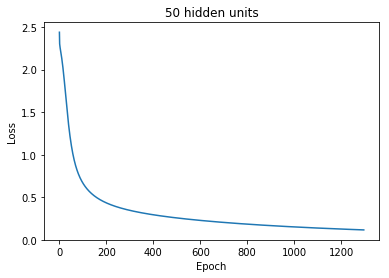

Loss: 		 0.11520214728939546
Iterations: 	 1298


In [129]:
fig_mlp_Hid50 = plt.figure()
ax1 = fig_mlp_Hid50.add_subplot(111)
ax1.plot(mlp_Hid50.loss_curve_)
ax1.set(title=r"50 hidden units", xlabel="Epoch", ylabel="Loss")

plt.show()

print('Loss: \t\t', mlp_Hid50.loss_)
print('Iterations: \t', mlp_Hid50.n_iter_)

In [167]:
print('\n50 hidden units\n')
print('Accuracy: ', accuracy_score(Y_test, mlp_Hid50.predict(X_test)), '\n')
print(classification_report(Y_test, mlp_Hid50.predict(X_test)))


50 hidden units

Accuracy:  0.929 

             precision    recall  f1-score   support

          0       0.95      0.99      0.97        83
          1       0.93      0.98      0.96       113
          2       0.90      0.92      0.91        89
          3       0.92      0.92      0.92        85
          4       0.91      0.94      0.93       106
          5       0.93      0.89      0.91       113
          6       0.98      0.92      0.95        96
          7       0.97      0.90      0.93       109
          8       0.89      0.92      0.90       108
          9       0.92      0.92      0.92        98

avg / total       0.93      0.93      0.93      1000



When you compare the results above to the first case studied, where we had the same setup except for the number of units in the hidden layer, the improvement in convergence and loss isn't significant.

Let's see now how it compares to the model with 100 hidden units.

### 100 hidden units

In [130]:
mlp_Hid100 = MLPClassifier(solver="sgd")
mlp_Hid100.hidden_layer_sizes = (100,)
mlp_Hid100.activation = "logistic"
mlp_Hid100.learning_rate_init = 0.5
mlp_Hid100.alpha = 0.0001
mlp_Hid100.batch_size = 4000
mlp_Hid100.shuffle = True
mlp_Hid100.random_state = 29
mlp_Hid100.momentum = 0
mlp_Hid100.verbose = False
mlp_Hid100.max_iter = 10000

mlp_Hid100.fit(X_train, Y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size=4000,
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.5, max_iter=10000, momentum=0,
       nesterovs_momentum=True, power_t=0.5, random_state=29, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

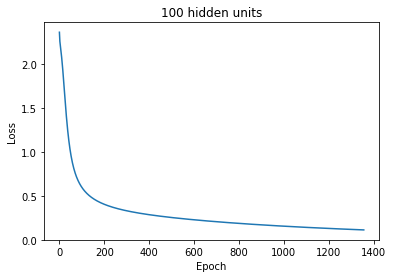

Loss: 		 0.11310872159810376
Iterations: 	 1357


In [131]:
fig_mlp_Hid100 = plt.figure()
ax1 = fig_mlp_Hid100.add_subplot(111)
ax1.plot(mlp_Hid100.loss_curve_)
ax1.set(title=r"100 hidden units", xlabel="Epoch", ylabel="Loss")

plt.show()

print('Loss: \t\t', mlp_Hid100.loss_)
print('Iterations: \t', mlp_Hid100.n_iter_)

In [168]:
print('\n100 hidden units\n')
print('Accuracy: ', accuracy_score(Y_test, mlp_Hid100.predict(X_test)), '\n')
print(classification_report(Y_test, mlp_Hid100.predict(X_test)))


100 hidden units

Accuracy:  0.926 

             precision    recall  f1-score   support

          0       0.95      0.96      0.96        83
          1       0.94      0.98      0.96       113
          2       0.87      0.93      0.90        89
          3       0.92      0.91      0.91        85
          4       0.92      0.92      0.92       106
          5       0.89      0.89      0.89       113
          6       0.96      0.91      0.93        96
          7       0.97      0.92      0.94       109
          8       0.90      0.92      0.91       108
          9       0.94      0.92      0.93        98

avg / total       0.93      0.93      0.93      1000



This model doesn't show significant improvement either. 

What we can do is now make adjustments to other hyper-parameters and, at last, evaluate the model's performance on the _"test dataset"_, which will tell us wether the training is overfitting or not and if our model is capable of generalization.

## Choosing a model - Evaluation on a test dataset
Up until now, we have modified one hyper-parameter at a time while keeping all others at a defined value.
We can try now to combine these adjustments in a way that, hopefully, improves our classifier even more.

One way of doing this is through _"grid search"_, which is basically a structured and organized way of varying different hyper-parameters and choosing the ones that give us the best results.

A grid search consists of:
- an estimator (regressor or classifier such as MLPClassifier);
- a parameter space;
- a method for searching or sampling candidates;
- a cross-validation scheme; and
- a score function.

(ref.: http://scikit-learn.org/stable/modules/grid_search.html#multimetric-grid-search)



### Parameter estimation using grid search with cross-validation


The experiment below shows how a classifier is optimized by cross-validation,
which is done using _"sklearn.model_selection.GridSearchCV"_.

This module performs a _"cross validation"_ over the training set, automatically splitting it into training and validation sets and evaluating the score metric for each of the parameter variations.

For instance, if you want to choose the best regularization value, this approach calculates a cross-validated performance score for each regularization value to be investigated, and returns the one that produced the best score.

Then, you can apply this network on a test dataset, which wasn't used until now, not even during cross validation. This gives the model's performance estimate on real world data, i.e., its capacity for generalization.

The next experiment will compare three different hidden layer sizes (25, 50 and 100), each with five regularization values (0.0001, 0.001, 0.01, 0.1 and 1), totalling 15 different cases.

The cross-validation scheme is cv=5, i.e., 4 folds for training (3200 samples) and 1 for validation (800 samples) for each run.

Based on what we have seen so far about this particular problem, we will set the batch size to 30 and use an innitial learning rate equal to 0.5 in a adaptive scheme, which lowers its value during training whenever the loss stops decreasing.


In [373]:
from sklearn.model_selection import GridSearchCV

parameters = {'hidden_layer_sizes': [25, 50, 100],
              'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}

classifier = MLPClassifier(solver="sgd",
                           activation = 'logistic',
                           batch_size = 30,
                           learning_rate_init = 0.5,
                           learning_rate = 'adaptive',
                           max_iter = 10000,
                           random_state = 29)

clf = GridSearchCV(estimator = classifier,
                   param_grid = parameters,
                   cv=5,
                   scoring='accuracy')

clf.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=MLPClassifier(activation='logistic', alpha=0.0001, batch_size=30, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='adaptive',
       learning_rate_init=0.5, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=29, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [25, 50, 100], 'alpha': [0.0001, 0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [381]:
print('\nGrid Cross-Validation\n')
print('Accuracy: ', accuracy_score(Y_test, clf.predict(X_test)), '\n')
print('Best parameters: ', clf.best_params_, '\n')

print("Grid scores on experiment:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print('\n\nPerformance report on best model over test dataset: \n')

print(classification_report(Y_test, clf.predict(X_test)))


Grid Cross-Validation

Accuracy:  0.943 

Best parameters:  {'alpha': 0.001, 'hidden_layer_sizes': 50} 

Grid scores on experiment:

0.911 (+/-0.016) for {'alpha': 0.0001, 'hidden_layer_sizes': 25}
0.922 (+/-0.012) for {'alpha': 0.0001, 'hidden_layer_sizes': 50}
0.905 (+/-0.030) for {'alpha': 0.0001, 'hidden_layer_sizes': 100}
0.917 (+/-0.011) for {'alpha': 0.001, 'hidden_layer_sizes': 25}
0.924 (+/-0.011) for {'alpha': 0.001, 'hidden_layer_sizes': 50}
0.913 (+/-0.018) for {'alpha': 0.001, 'hidden_layer_sizes': 100}
0.917 (+/-0.025) for {'alpha': 0.01, 'hidden_layer_sizes': 25}
0.923 (+/-0.012) for {'alpha': 0.01, 'hidden_layer_sizes': 50}
0.922 (+/-0.018) for {'alpha': 0.01, 'hidden_layer_sizes': 100}
0.897 (+/-0.012) for {'alpha': 0.1, 'hidden_layer_sizes': 25}
0.896 (+/-0.012) for {'alpha': 0.1, 'hidden_layer_sizes': 50}
0.897 (+/-0.012) for {'alpha': 0.1, 'hidden_layer_sizes': 100}
0.777 (+/-0.020) for {'alpha': 1, 'hidden_layer_sizes': 25}
0.789 (+/-0.022) for {'alpha': 1, 'hidde

# Conclusion
We have seen how different hyper-parameters can affect a MLP behavior. More importantly, we have discussed that these effect can vary depending on the dataset being worked with.

Grid search cross validation helped find a good fit, but the cost of performing such an extensive search can become prohibitive. That's why previous knowledge of the type of data and of the typical behavior of the model being used is so important.
